In [16]:
import sys
import os
import numpy as np
sys.path.append('..') 
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.widgets as sw
from utils.ephys.hdf5extractor import read_hdf5
import h5py 
import matplotlib.pyplot as plt
%matplotlib widget
# %matplotlib inline

In [35]:
rec_file = r"D:\raw_ephys_conversion\ZS061\mZS061d20210328\neuralynx\session\raw_data.hdf5"
nwb_file = r"F:\ZS061\mZS061d20210328\sorted\session\behavior_ZS061_2021-03-28_16-35-51_nwb.zarr"
sorted_data_dir = r"F:\ZS061\mZS061d20210328\neuralynx\session"

In [36]:
rec = read_hdf5(rec_file)
print(rec)

(32, 95402336)
HDF5Recording: 32 channels - 32.0kHz - 1 segments - 95,402,336 samples - 2,981.32s (49.69 minutes) 
               int32 dtype - 11.37 GiB
  file_path: D:\raw_ephys_conversion\ZS061\mZS061d20210328\neuralynx\session\raw_data.hdf5


In [7]:
start_time = rec.get_start_time()
end_time = rec.get_end_time()

In [37]:
rec.get_num_channels(), rec.get_num_samples()

(32, 95402336)

In [38]:
sample = rec.get_traces(start_frame=0, end_frame=10*rec.get_sampling_frequency())

In [10]:
#plt.plot(sample);

In [11]:
# # read hdf5 file
# file = r"D:\raw_ephys_conversion\ZS062\mZS062d20210405\neuralynx\session\raw_data.hdf5"

# with h5py.File(file, "r") as f:
#     dset = f["/samples"]
#     subset = dset[:, 32000*10:32000*11]   # first 10 rows, all columns
#     print(dset.dtype)

In [12]:
rec.get_channel_groups()

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
       5, 5, 6, 6, 6, 6, 7, 7, 7, 7], dtype=int64)

In [39]:
bad_channels= ['10']
# rec = rec.remove_channels(bad_channels)
recording_raw_fake = spre.bandpass_filter(rec, freq_min=50, freq_max=8000)
recording_raw_fake = spre.common_reference(recording_raw_fake)

In [40]:
sw.set_default_plotter_backend('ipywidgets')

In [41]:
sw.plot_traces(recording_raw_fake, color_groups = True)

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [ ]:
# sorting = se.read_nwb_sorting(
#     nwb_file, sampling_frequency=rec.sampling_frequency, t_start=start_time
# )
# sorting = sorting.rename_units(sorting.get_property('unit_id'))
# units = list(sorting.unit_ids)
# group = [int(unit_id[2])-1 for unit_id in units]
# sorting.set_property('group', group)
# sorting.get_property('group')

c:\Users\zhixi\Anaconda3\envs\rigqc\Lib\site-packages\spikeinterface\extractors\nwbextractors.py:1304: UserWarning: Skipping wf_2d_opto because of unequal shapes across units
  warnings.warn(f"Skipping {property_name} because of unequal shapes across units")


array([0, 0, 2, 2, 2, 3, 4])

In [ ]:
# unit_ids = sorting.unit_ids
# unit_ids

array(['TT1_SS_01', 'TT1_SS_03', 'TT3_SS_01', 'TT3_SS_02', 'TT3_SS_03',
       'TT4_SS_01', 'TT5_SS_01'], dtype='<U9')

In [ ]:
# file = os.path.join(sorted_data_dir, "TT1_SS_01.txt")
# timestamps = np.loadtxt(file)/1000000

In [ ]:
# rec.get_probes()

[Probe - 4ch - 1shanks,
 Probe - 4ch - 1shanks,
 Probe - 4ch - 1shanks,
 Probe - 4ch - 1shanks,
 Probe - 4ch - 1shanks,
 Probe - 4ch - 1shanks,
 Probe - 4ch - 1shanks,
 Probe - 4ch - 1shanks]

In [63]:
# gather all spike times
all_spike_times = []
all_labels = []
for unit_id in unit_ids:
    file = os.path.join(sorted_data_dir, f"{unit_id}.txt")
    timestamps = list(np.loadtxt(file)/1000000)
    all_spike_times.extend(timestamps)
    all_labels.extend(list(np.full(len(timestamps), fill_value=unit_id)))


In [64]:
timestamps[0]

438942.933258

In [65]:
start_time

438942.710445

In [62]:
rec_timestamps = rec.get_times()

In [ ]:
# # convert to timestamps
# rec_timestamps = rec.get_times()
# all_spike_times = np.asarray(all_spike_times)

# idx = np.searchsorted(rec_timestamps, all_spike_times)
# idx[idx == len(rec_timestamps)] = len(rec_timestamps) - 1  # clip overflow
# # Correct for the fact that closest could be on the left or right
# left_idx = np.clip(idx - 1, 0, len(rec_timestamps)-1)
# # Pick whichever neighbor is closer
# choose_left = np.abs(all_spike_times - rec_timestamps[left_idx]) < np.abs(all_spike_times - rec_timestamps[idx])
# frame_ind = np.where(choose_left, left_idx, idx)

In [43]:
import json
sparsity_params_file = r'C:\Users\zhixi\Documents\GitHub\aind_su_etal_2022\notebooks\params.json'
with open(sparsity_params_file, 'r') as f:
    postprocessing_params = json.load(f)
job_kwargs = postprocessing_params.pop("job_kwargs")
job_kwargs["n_jobs"] = 8
si.set_global_job_kwargs(**job_kwargs)

sparsity_params = postprocessing_params.pop("sparsity")
quality_metrics_names = postprocessing_params.pop("quality_metrics_names")
quality_metrics_params = postprocessing_params.pop("quality_metrics")

analyzer_dict = postprocessing_params.copy()
analyzer_dict.pop("duplicate_threshold")
analyzer_dict.pop("return_scaled")

True

In [44]:
analyzer_dict

{'random_spikes': {'max_spikes_per_unit': 500,
  'method': 'uniform',
  'margin_size': None,
  'seed': None},
 'noise_levels': {'num_chunks_per_segment': 20,
  'chunk_size': 10000,
  'seed': None},
 'waveforms': {'ms_before': 3.0, 'ms_after': 4.0, 'dtype': None},
 'templates': {},
 'spike_amplitudes': {'peak_sign': 'neg'},
 'template_similarity': {'method': 'l1'},
 'correlograms': {'window_ms': 50.0, 'bin_ms': 1.0},
 'isi_histograms': {'window_ms': 100.0, 'bin_ms': 5.0},
 'unit_locations': {'method': 'monopolar_triangulation'},
 'spike_locations': {'method': 'grid_convolution'},
 'template_metrics': {'upsampling_factor': 10,
  'sparsity': None,
  'include_multi_channel_metrics': True},
 'principal_components': {'n_components': 5,
  'mode': 'by_channel_local',
  'whiten': True}}

In [66]:
sorting = si.NumpySorting.from_samples_and_labels(
    samples_list= np.array(frame_ind),
    labels_list= np.array(all_labels),
    sampling_frequency=rec.sampling_frequency,
)
units = list(sorting.unit_ids)
group = [int(unit_id[2])-1 for unit_id in units]
sorting.set_property('group', group)
sorting.get_property('group')
# sorting_saved = sorting.save(folder=os.path.join(sorted_data_dir,"highres_timestamps_sorting"), overwrite=True)
# # sorting_loaded = si.load("..")

array([0, 0, 2, 2, 2, 3, 4])

In [46]:
sorting.get_property('group')

array([0, 0, 2, 2, 2, 3, 4])

In [55]:
si.set_global_job_kwargs(n_jobs=0.7, mp_context='spawn', progress_bar=True)

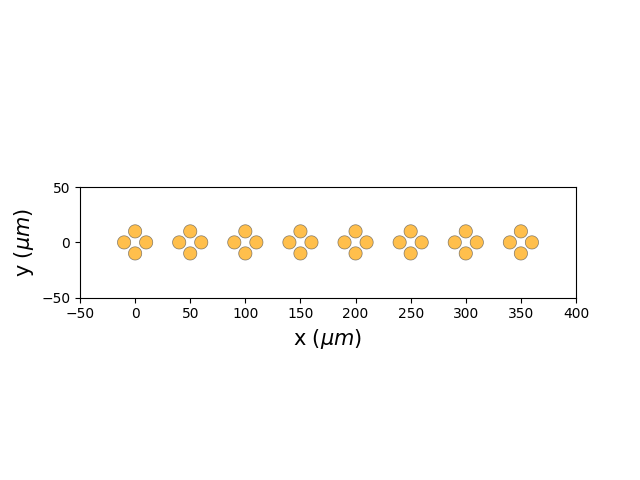

In [48]:
sw.plot_probe_map(recording_raw_fake, backend="matplotlib")

In [67]:
analyzer = si.create_sorting_analyzer(
    sorting=sorting,
    recording=recording_raw_fake,
    # radius_um=30,
    method="by_property",
    by_property="group",
    # sparsity=False
)

In [74]:
_ = analyzer.compute(analyzer_dict)

c:\Users\zhixi\Anaconda3\envs\rigqc\Lib\site-packages\spikeinterface\core\recording_tools.py:780: UserWarning: get_noise_levels(recording, num_chunks_per_segment=20) is deprecated
Now, you need to use get_noise_levels(recording, random_slices_kwargs=dict(num_chunks_per_segment=20, chunk_size=1000))
Please read get_random_recording_slices() documentation for more options.
  warnings.warn(msg)


noise_level (workers: 11 processes):   0%|          | 0/20 [00:00<?, ?it/s]

compute_waveforms (workers: 11 processes):   0%|          | 0/2982 [00:00<?, ?it/s]

c:\Users\zhixi\Anaconda3\envs\rigqc\Lib\site-packages\spikeinterface\postprocessing\template_metrics.py:303: UserWarning: With less than 10 channels, multi-channel metrics might not be reliable.
  warnings.warn(
c:\Users\zhixi\Anaconda3\envs\rigqc\Lib\site-packages\spikeinterface\postprocessing\template_metrics.py:303: UserWarning: With less than 10 channels, multi-channel metrics might not be reliable.
  warnings.warn(
c:\Users\zhixi\Anaconda3\envs\rigqc\Lib\site-packages\spikeinterface\postprocessing\template_metrics.py:303: UserWarning: With less than 10 channels, multi-channel metrics might not be reliable.
  warnings.warn(
c:\Users\zhixi\Anaconda3\envs\rigqc\Lib\site-packages\spikeinterface\postprocessing\template_metrics.py:303: UserWarning: With less than 10 channels, multi-channel metrics might not be reliable.
  warnings.warn(
c:\Users\zhixi\Anaconda3\envs\rigqc\Lib\site-packages\spikeinterface\postprocessing\template_metrics.py:303: UserWarning: With less than 10 channels, mu

Fitting PCA:   0%|          | 0/7 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/7 [00:00<?, ?it/s]

Compute : spike_amplitudes + spike_locations (workers: 11 processes):   0%|          | 0/2982 [00:00<?, ?it/s]

In [68]:
_ = analyzer.compute("random_spikes", method="uniform")
_ = analyzer.compute(["waveforms", "templates"])

compute_waveforms (workers: 11 processes):   0%|          | 0/2982 [00:00<?, ?it/s]

In [60]:
spikes = sorting.to_spike_vector()
spikes[:10]

array([( 96704000, 2, 0), (172576000, 3, 0), (210528000, 1, 0),
       (228160000, 6, 0), (332544000, 5, 0), (342304000, 2, 0),
       (495328000, 2, 0), (690144000, 6, 0), (718496000, 4, 0),
       (898304000, 2, 0)],
      dtype=[('sample_index', '<i8'), ('unit_index', '<i8'), ('segment_index', '<i8')])

In [61]:
96704000 / 32000

3022.0

In [161]:
_ = analyzer.compute(
    "quality_metrics",
    metric_names=quality_metrics_names,
    qm_params=quality_metrics_params
)
# waveform_zarr_folder = f'{session_dir[f"ephys_dir_{data_type}"]}/waveforms.zarr'
# if os.path.exists(waveform_zarr_folder):
#     print("Zarr folder already exists, deleting.")
#     shutil.rmtree(waveform_zarr_folder)

In [191]:
qm = analyzer.get_extension("quality_metrics").get_data()
qm

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,...,firing_range,drift_ptp,drift_std,drift_mad,isolation_distance,l_ratio,d_prime,silhouette,nn_hit_rate,nn_miss_rate
TT1_SS_01,4847,1.625788,1,17.887289,0.0,0,0.0,0,0.1,0.000962,...,1.6,<NA>,<NA>,<NA>,460.336256,0.0,11.573914,0.244677,0.970667,0.025333
TT1_SS_03,4800,1.610023,1,10.636731,0.0,0,0.0,0,0.075,0.000079,...,1.4,<NA>,<NA>,<NA>,579.134599,0.0,11.573914,0.342191,0.974667,0.029333
TT3_SS_01,11720,3.931141,1,5.547066,0.007235,1,0.0,0,0.015,0.001368,...,3.4,1.017542,0.232956,0.180149,126.109493,0.0109,5.583823,0.292775,0.944667,0.045333
TT3_SS_02,4548,1.525497,1,15.104819,0.192179,4,0.0,0,0.17,0.000707,...,1.4,<NA>,<NA>,<NA>,58.176264,0.007145,6.50936,0.301044,0.912,0.011333
TT3_SS_03,3463,1.161565,1,7.892057,0.165734,2,0.0,0,0.185,0.000881,...,1.4,<NA>,<NA>,<NA>,70.729837,0.09879,4.225789,0.299599,0.921333,0.054333
TT4_SS_01,4115,1.38026,1,16.123093,0.0,0,0.0,0,0.1,0.001174,...,1.2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
TT5_SS_01,5794,1.943432,1,14.035179,0.059205,2,0.045436,1,0.12,0.000091,...,1.2,2.323839,0.400937,0.255893,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [69]:
wfs_ext = analyzer.get_extension("waveforms")
wfs_one = wfs_ext.get_waveforms_one_unit(unit_id=analyzer.unit_ids[4])

In [70]:
wfs_one.shape

(500, 96, 4)

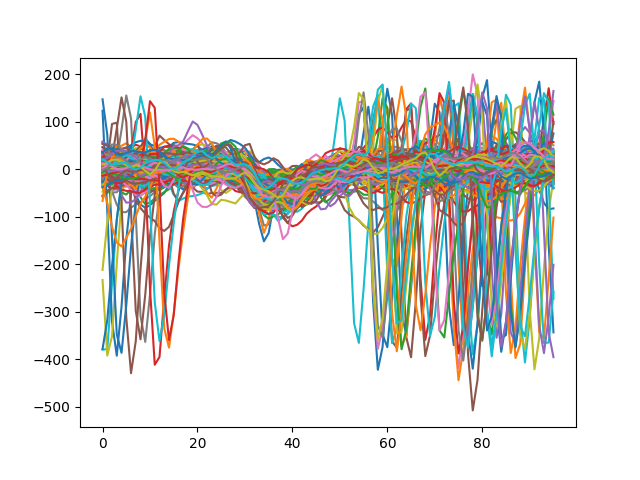

In [71]:
plt.figure()
plt.plot(wfs_one[:, :, 0].T);

In [72]:
sw.set_default_plotter_backend("ipywidgets")
%matplotlib widget

In [73]:
sw.plot_unit_templates(analyzer)

AppLayout(children=(HBox(children=(Checkbox(value=False, description='same axis'), Checkbox(value=True, descri…

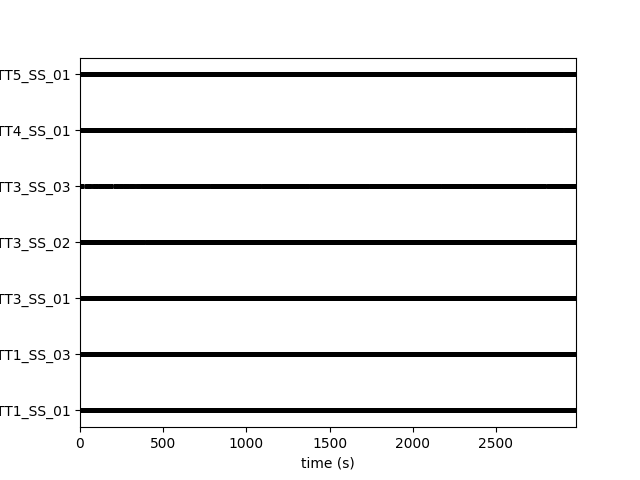

In [78]:
sw.plot_rasters(sorting, backend='matplotlib')

In [87]:
session_list

,session_id,raw_data,old_id
0,behavior_ZS059_2021-03-24_14-22-04,478c9648-c97c-4618-9c75-15293beba358,mZS059d20210324
1,behavior_ZS059_2021-03-25_14-40-45,a527b2e5-f42f-4942-af21-a7443b42c1ae,mZS059d20210325
2,behavior_ZS059_2021-03-26_13-52-11,5b7e4a84-e4af-4b0a-9953-7867e5efa68d,mZS059d20210326
3,behavior_ZS059_2021-03-27_16-03-00,f737f7a2-b040-4fb0-a662-e481108053f7,mZS059d20210327
4,behavior_ZS059_2021-03-28_14-18-58,92928a74-17a5-41ab-a4b1-1dafe90eaba9,mZS059d20210328
...,...,...,...
162,behavior_ZS062_2021-05-07_17-38-21,e87dfe98-0abe-41d0-bdf3-d6ce59d25638,mZS062d20210507
163,behavior_ZS062_2021-05-08_18-43-47,38d1a26d-7517-4b88-b34a-cdf36495e88f,mZS062d20210508
164,behavior_ZS062_2021-05-09_17-15-10,d4551236-28b1-496a-80bd-38a22385bb6b,mZS062d20210509
165,behavior_ZS062_2021-05-10_19-15-51,e60c72d5-878f-4240-95dd-66e2d102e96a,mZS062d20210510


In [ ]:
# gather info for correction
session_list = pd.read_csv(r'F:/hopkins_session_assets.csv')
hdf5_to_change = []
for index, row in session_list.iterrows():
    session_id = row['old_id']
    
